# Simple Lineear Regression

## Prediction of CO2 Emission based on the model specific fuel consumption ratings

### Import required packages

In [5]:
# Load the require libraries and packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the dataset

In [6]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# Let's select some features to explore more.
ndf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
ndf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


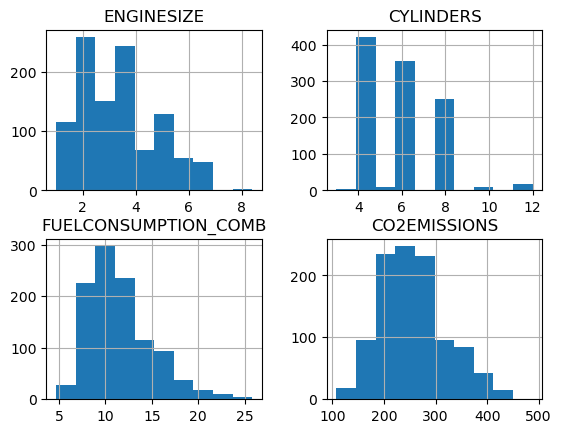

In [11]:
# Plotting the features
ndf.hist()  # shows the distribution of values.
plt.show()

In [12]:
# Scatter plot is used to visualize the relationship between the features.

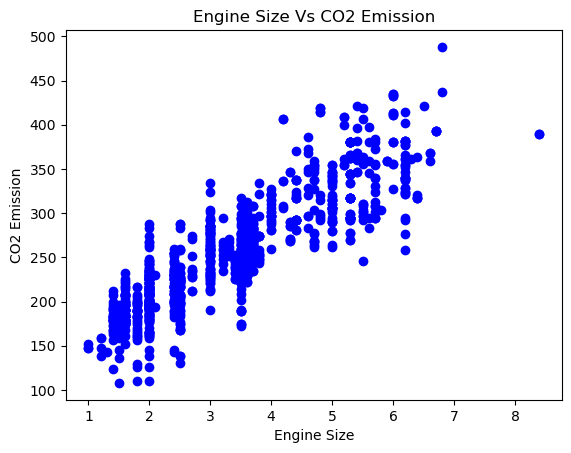

In [17]:
plt.scatter(ndf.ENGINESIZE, ndf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Engine Size Vs CO2 Emission")
plt.show()

### Creating train and test dataset¶

In [32]:
# Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy

masks = np.random.rand(len(df)) < 0.8   # This will create the boolean array of size equal to rows in df
train = ndf[masks]   # This will selects the rows from ndf dataframe where the value on masks is true
test = ndf[~masks]   # # This will selects the rows from ndf dataframe where the value on masks is false
# train.head()
# test.head()
print(len(train), len(test))

# Hence the dataset is split into training and testing dataset in the proportion of 8:2

850 217


### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


In [38]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(train_x, train_y)

print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficient:  [[38.37556687]]
Intercept:  [126.5225963]


### Plot Outputs

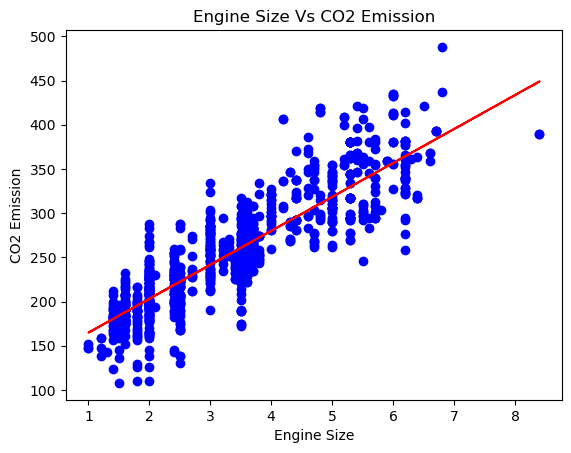

In [40]:
plt.scatter(ndf.ENGINESIZE, ndf.CO2EMISSIONS, color="blue")
x = train_x
y = reg.intercept_[0] + reg.coef_[0][0] * train_x
plt.plot(x, y, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Engine Size Vs CO2 Emission")
plt.show()

### Model Evaluation

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

y_pred = reg.predict(test_x)

print("MSE: %.2f" %mean_squared_error(test_y, y_pred))
print("R-squared: %.2f" %r2_score(test_y, y_pred))

MSE: 1132.41
R-squared: 0.75


### Thank You